In [33]:
import pandas as pd
import nltk
from textblob import TextBlob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [34]:
data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\raw_analyst_ratings.csv")

In [35]:
data.rename(columns={"date": "Date"}, inplace=True)

In [36]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [37]:
data['Date'] = data['Date'].str.split(' ').str[0]


In [38]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


In [39]:

company_to_filter = 'GOOG'
data_filtered =data[data['stock'] == company_to_filter]

In [40]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
565380,568379,"Facebook, Snap Analyst Projects Q2 Revenue Ups...",https://www.benzinga.com/analyst-ratings/analy...,Shanthi Rexaline,2020-06-10,GOOG
565381,568380,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,GOOG
565382,568381,"Twitter, Square Will Mark Juneteenth As Holida...",https://www.benzinga.com/news/20/06/16218441/t...,Shivdeep Dhaliwal,2020-06-10,GOOG
565383,568382,Price Over Earnings Overview: Alphabet,https://www.benzinga.com/intraday-update/20/06...,Benzinga Insights,2020-06-09,GOOG
565384,568383,Google Maps To Offer Relevant Local COVID-19 I...,https://www.benzinga.com/news/20/06/16208274/g...,Shivdeep Dhaliwal,2020-06-09,GOOG


In [41]:
# Function to get the sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [42]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
565380,568379,"Facebook, Snap Analyst Projects Q2 Revenue Ups...",https://www.benzinga.com/analyst-ratings/analy...,Shanthi Rexaline,2020-06-10,GOOG
565381,568380,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,GOOG
565382,568381,"Twitter, Square Will Mark Juneteenth As Holida...",https://www.benzinga.com/news/20/06/16218441/t...,Shivdeep Dhaliwal,2020-06-10,GOOG
565383,568382,Price Over Earnings Overview: Alphabet,https://www.benzinga.com/intraday-update/20/06...,Benzinga Insights,2020-06-09,GOOG
565384,568383,Google Maps To Offer Relevant Local COVID-19 I...,https://www.benzinga.com/news/20/06/16208274/g...,Shivdeep Dhaliwal,2020-06-09,GOOG


In [43]:
data_filtered.loc[:, 'sentiment'] = data_filtered['headline'].apply(get_sentiment)

C:\Users\befekadum\AppData\Local\Temp\ipykernel_12276\1231557142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, 'sentiment'] = data_filtered['headline'].apply(get_sentiment)


In [44]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock,sentiment
565380,568379,"Facebook, Snap Analyst Projects Q2 Revenue Ups...",https://www.benzinga.com/analyst-ratings/analy...,Shanthi Rexaline,2020-06-10,GOOG,0.033333
565381,568380,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,GOOG,0.000000
565382,568381,"Twitter, Square Will Mark Juneteenth As Holida...",https://www.benzinga.com/news/20/06/16218441/t...,Shivdeep Dhaliwal,2020-06-10,GOOG,0.000000
565383,568382,Price Over Earnings Overview: Alphabet,https://www.benzinga.com/intraday-update/20/06...,Benzinga Insights,2020-06-09,GOOG,0.000000
565384,568383,Google Maps To Offer Relevant Local COVID-19 I...,https://www.benzinga.com/news/20/06/16208274/g...,Shivdeep Dhaliwal,2020-06-09,GOOG,0.133333


In [45]:
data_filtered[['Date', 'headline', 'sentiment']].head()

,Date,headline,sentiment
565380,2020-06-10,"Facebook, Snap Analyst Projects Q2 Revenue Ups...",0.033333
565381,2020-06-10,How Cannabis Company Cannaphyll Is Marketing O...,0.000000
565382,2020-06-10,"Twitter, Square Will Mark Juneteenth As Holida...",0.000000
565383,2020-06-09,Price Over Earnings Overview: Alphabet,0.000000
565384,2020-06-09,Google Maps To Offer Relevant Local COVID-19 I...,0.133333


In [46]:
new_data_filtered = data_filtered.loc[:, ['Date', 'sentiment']]
new_data_filtered.head()

,Date,sentiment
565380,2020-06-10,0.033333
565381,2020-06-10,0.000000
565382,2020-06-10,0.000000
565383,2020-06-09,0.000000
565384,2020-06-09,0.133333


In [47]:
stock_data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\data\GOOG_historical_data.csv")

In [48]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [49]:
#stock_data= stock_data.index
new_stock_data=pd.DataFrame(stock_data, columns=['Date','Close'])

In [50]:
new_stock_data.head()

,Date,Close
0,2004-08-19,2.499133
1,2004-08-20,2.697639
2,2004-08-23,2.724787
3,2004-08-24,2.611960
4,2004-08-25,2.640104


In [51]:
#print(new_data_filtered['Date'].min(), new_data_filtered['Close'].max())
#print(stock_data.index.min(), stock_data.index.max())

In [52]:
print(new_stock_data.columns)

Index(['Date', 'Close'], dtype='object')


In [53]:
# Aligning sentiment scores with the stock closing prices on the same date
#new_data_filtered= 
#new_stock_data = 
combined_data= new_data_filtered.set_index('Date').join(new_stock_data.set_index('Date'))
#combined_data.head()

In [54]:
print(new_stock_data[['Close']])

           Close
0       2.499133
1       2.697639
2       2.724787
3       2.611960
4       2.640104
...          ...
5015  174.369995
5016  169.160004
5017  168.679993
5018  171.130005
5019  171.860001

[5020 rows x 1 columns]


In [55]:
combined_data.head()

,sentiment,Close
Date,,
2020-06-10,0.033333,73.292503
2020-06-10,0.000000,73.292503
2020-06-10,0.000000,73.292503
2020-06-09,0.000000,72.807999
2020-06-09,0.133333,72.807999


In [56]:
combined_data.tail()

,sentiment,Close
Date,,
2018-11-15,0.436111,53.235500
2018-11-14,0.113636,52.182999
2018-11-14,0.000000,52.182999
2018-11-13,0.000000,51.802502
2018-11-13,0.000000,51.802502


In [57]:
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

C:\Users\befekadum\AppData\Local\Temp\ipykernel_12276\707584225.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [58]:
correlation = combined_data['sentiment'].corr(combined_data['Daily Returns'])
print("Correlation between sentiment and daily stock returns:", correlation)

Correlation between sentiment and daily stock returns: -5.350580096538332e-05


In [59]:
correlation = combined_data['sentiment'].corr(combined_data['Close'])
print("Correlation between sentiment and closing:", correlation)

Correlation between sentiment and closing: 0.02095260193742992


In [60]:
# Calculate daily returns (percentage change in closing price)
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

# Drop any rows with NaN values (e.g., the first row after pct_change)
#combined_data.dropna(inplace=True)

C:\Users\befekadum\AppData\Local\Temp\ipykernel_12276\3748235246.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [61]:
correlation_matrix = combined_data.corr()

In [62]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               sentiment     Close  Daily Returns
sentiment       1.000000  0.020953      -0.000054
Close           0.020953  1.000000       0.054199
Daily Returns  -0.000054  0.054199       1.000000


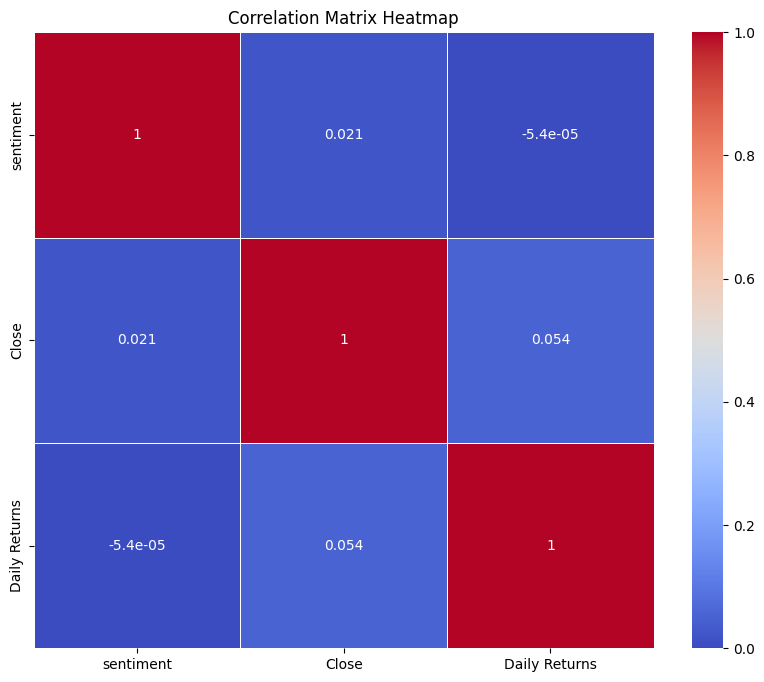

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()